# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# ensure viewability of rows and columns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [3]:
# check seperator used in csv file

!head -n1 'Udacity_AZDIAS_Subset.csv'

AGER_TYP;ALTERSKATEGORIE_GROB;ANREDE_KZ;CJT_GESAMTTYP;FINANZ_MINIMALIST;FINANZ_SPARER;FINANZ_VORSORGER;FINANZ_ANLEGER;FINANZ_UNAUFFAELLIGER;FINANZ_HAUSBAUER;FINANZTYP;GEBURTSJAHR;GFK_URLAUBERTYP;GREEN_AVANTGARDE;HEALTH_TYP;LP_LEBENSPHASE_FEIN;LP_LEBENSPHASE_GROB;LP_FAMILIE_FEIN;LP_FAMILIE_GROB;LP_STATUS_FEIN;LP_STATUS_GROB;NATIONALITAET_KZ;PRAEGENDE_JUGENDJAHRE;RETOURTYP_BK_S;SEMIO_SOZ;SEMIO_FAM;SEMIO_REL;SEMIO_MAT;SEMIO_VERT;SEMIO_LUST;SEMIO_ERL;SEMIO_KULT;SEMIO_RAT;SEMIO_KRIT;SEMIO_DOM;SEMIO_KAEM;SEMIO_PFLICHT;SEMIO_TRADV;SHOPPER_TYP;SOHO_KZ;TITEL_KZ;VERS_TYP;ZABEOTYP;ALTER_HH;ANZ_PERSONEN;ANZ_TITEL;HH_EINKOMMEN_SCORE;KK_KUNDENTYP;W_KEIT_KIND_HH;WOHNDAUER_2008;ANZ_HAUSHALTE_AKTIV;ANZ_HH_TITEL;GEBAEUDETYP;KONSUMNAEHE;MIN_GEBAEUDEJAHR;OST_WEST_KZ;WOHNLAGE;CAMEO_DEUG_2015;CAMEO_DEU_2015;CAMEO_INTL_2015;KBA05_ANTG1;KBA05_ANTG2;KBA05_ANTG3;KBA05_ANTG4;KBA05_BAUMAX;KBA05_GBZ;BALLRAUM;EWDICHTE;INNENSTADT;GEBAEUDETYP_RASTER;KKK;MOBI_REGIO;ONLINE_AFFINITAET;REGIOTYP;KBA13_ANZAHL_PKW;PLZ8_ANTG

In [4]:
!head -n1 'AZDIAS_Feature_Summary.csv'

attribute;information_level;type;missing_or_unknown


In [5]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', delimiter = ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter = ';')

In [6]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

In [7]:
print(azdias.shape)

(891221, 85)


In [8]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [9]:
print(feat_info.shape)

(85, 4)


In [10]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [11]:
feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].str.replace('[','').str.replace(']','').str.split(',')
feat_info.set_index(['attribute'], inplace=True)

for attr in feat_info.index:
    for x in feat_info.loc[attr]['missing_or_unknown']:
        try:
            azdias[attr].replace(int(x), np.nan, inplace=True)
        except ValueError:    
            azdias[attr].replace(x, np.nan, inplace=True)           

In [12]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,4,NaN,10.0,0,NaN,15.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,1,1996.0,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,NaN,2.0,5,NaN,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,1,1979.0,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,NaN,1.0,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,NaN,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,6,1957.0,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,NaN,1.0,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,5,1963.0,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,NaN,2.0,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,NaN,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [13]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

col_missing = azdias.isnull().sum()

print(f'Number of columns with missing data is {col_missing[col_missing != 0].count()}.')
print(f'Number of columns without missing data is {col_missing[col_missing == 0].count()}.')

Number of columns with missing data is 61.
Number of columns without missing data is 24.


In [14]:
col_missing.describe()

count        85.000000
mean      98516.811765
std      146604.203317
min           0.000000
25%           0.000000
50%       93148.000000
75%      116515.000000
max      889061.000000
dtype: float64

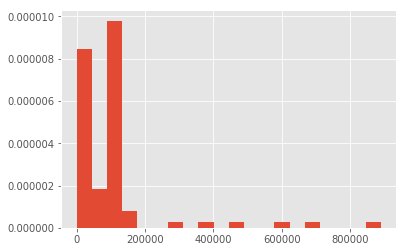

In [15]:
# Investigate patterns in the amount of missing data in each column.

col_missing.hist(bins = 20, normed = True)

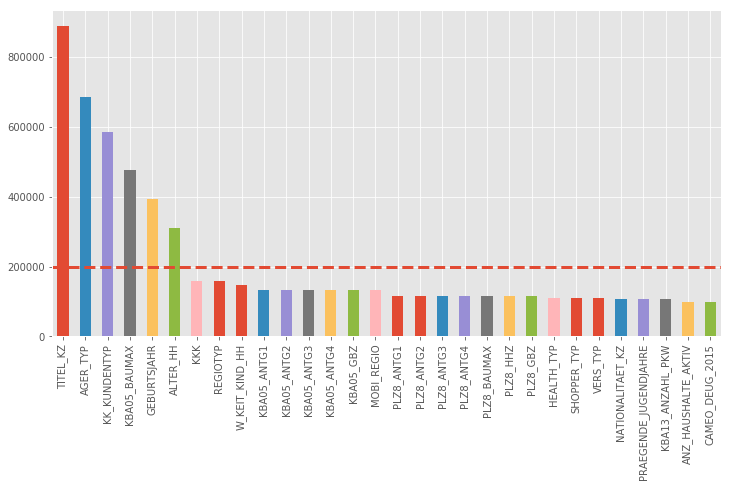

In [16]:
plt = col_missing.nlargest(30).plot.bar(figsize=(12,6))
plt.axhline(y=200000, linestyle='dashed', linewidth=3)

In [17]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

outlier_col_idx = col_missing[col_missing > 200000].index
outlier_col_idx

Index(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
       'KBA05_BAUMAX'],
      dtype='object')

In [18]:
print(f'The number of columns before dropping missing cases is {azdias.shape[1]}.')

azdias.drop(outlier_col_idx, axis=1, inplace=True)
print(f'The number of columns after dropping missing cases is {azdias.shape[1]}.')

The number of columns before dropping missing cases is 85.
The number of columns after dropping missing cases is 79.


#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

- Of the 85 variables in the population dataset, 61 have missing values. 
- On average, number of missing values is 98516. 
- Reviewing histogram of missing value counts, majority of the variables are with less than 200,000 missing cases. We opt to use 200,000 as threshold to identify candidates for exclusion. 6 variables, namely 'TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', and 'ALTER_HH', are dropped as result. 

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [19]:
# How much data is missing in each row of the dataset?

num_row = azdias.shape[0]

row_missing = azdias.isnull().sum(axis = 1)
num_row_missing = row_missing[row_missing != 0].count()
num_row_nomissing = row_missing[row_missing == 0].count()
pct_row_missing = round(num_row_missing/(num_row_missing + num_row_nomissing), 3)

print(f'Number of rows is {num_row}.')
print(f'Number of rows with missing data is {num_row_missing}.')
print(f'Number of rows without missing data is {num_row_nomissing}.')
print(f'Percent of rows with missing data is {pct_row_missing}.')                       

Number of rows is 891221.
Number of rows with missing data is 268012.
Number of rows without missing data is 623209.
Percent of rows with missing data is 0.301.


In [20]:
row_missing.describe()

count    891221.000000
mean          5.649894
std          13.234687
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          49.000000
dtype: float64

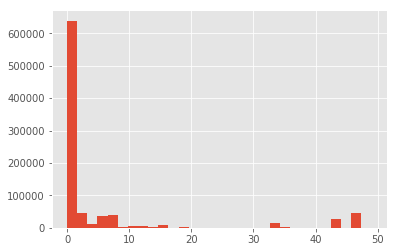

In [21]:
row_missing.hist(bins = 30)

In [22]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

row_no_missing_idx = row_missing[row_missing == 0].index
row_few_missing_idx  = row_missing[row_missing <= 20].index
row_many_missing_idx = row_missing[row_missing > 20].index

In [23]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

import matplotlib.pyplot as plt

def compare_plot(column):
    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(121)
    ax1.title.set_text('Few missing rows')
    sns.countplot(azdias.loc[row_few_missing_idx, column])

    ax2 = fig.add_subplot(122)
    ax2.title.set_text('Many missing rows')
    sns.countplot(azdias.loc[row_many_missing_idx, column])

    fig.suptitle(column)
    plt.tight_layout()
    plt.show()

In [24]:
columns_to_compare = azdias.columns[azdias.isnull().sum() == 0].tolist()[:5]
columns_to_compare

['ANREDE_KZ',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER']

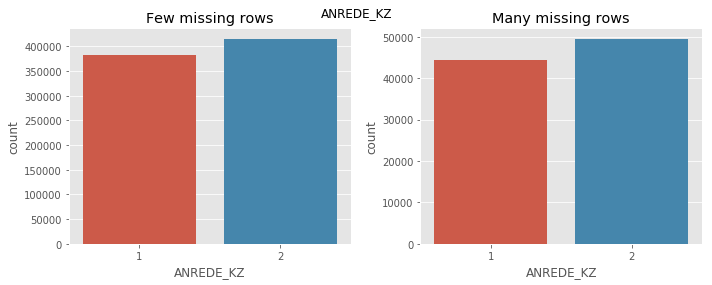

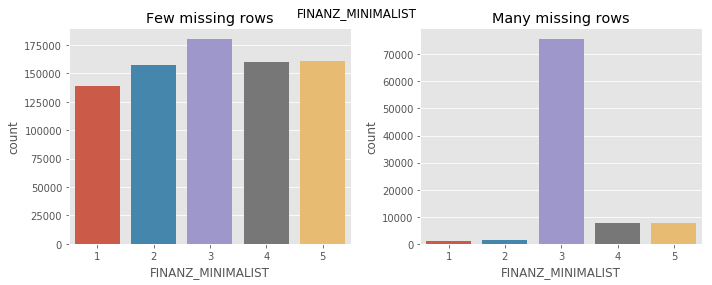

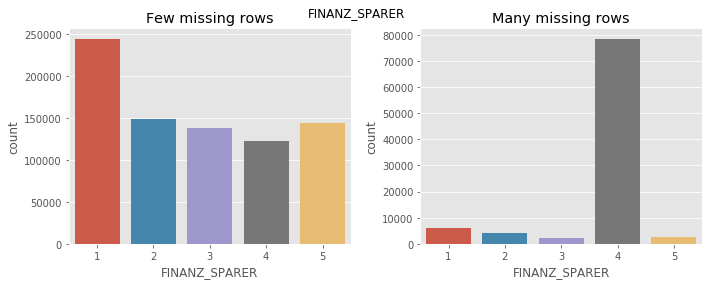

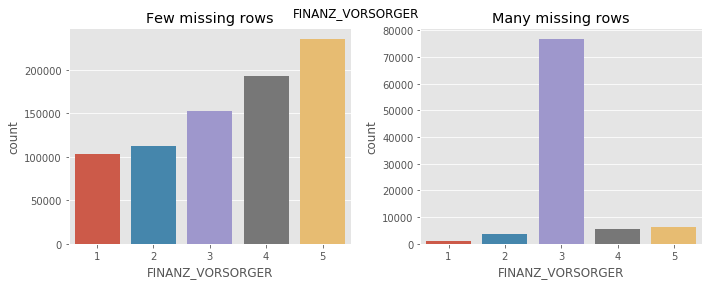

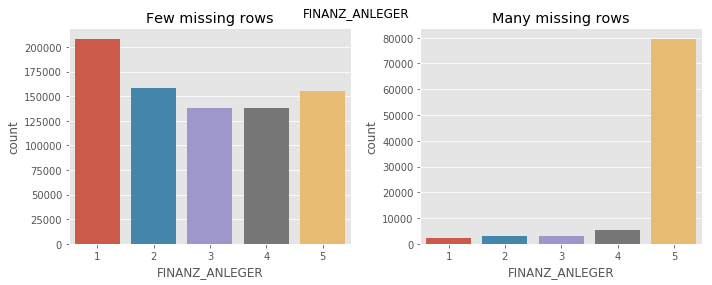

[None, None, None, None, None]

In [25]:
[compare_plot(c) for c in columns_to_compare]

In [26]:
azdias_with_many_missing = azdias.copy(deep = True)

In [27]:
# Drop rows with many missing values

print(f'The number of rows before dropping missing cases is {azdias.shape[0]}.')

azdias.drop(row_many_missing_idx, axis = 0, inplace = True) 
print(f'The number of rows after dropping missing cases is {azdias.shape[0]}.')

The number of rows before dropping missing cases is 891221.
The number of rows after dropping missing cases is 797426.


#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)

* Total number of observation is 891221. Number of observation without any missing is only 623209. Effectively, 30% of cases have missing data on at least one of the columns.


* Comparison of distribution of columns across rows without missing cases and rows with less than 20 missing cases reveal drastically different pattern. This suggest that missing rows may not be completely random, or at least missing rows impact the distribution of variables.  


* For ensusing analysis, we drop rows with too many missing values for reason of simplicity. In production setting, we might consider imputing missing cases as alternative approach.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [28]:
# How many features are there of each data type?

feat_info['type'].value_counts()

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [29]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

categorical = feat_info[feat_info['type'] == 'categorical'].index.values
categorical = [x for x in categorical if x in azdias.columns] 
binary = [x for x in categorical if azdias[x].nunique()==2]
multilevel = [x for x in categorical if azdias[x].nunique()>2]

mixed = feat_info[feat_info['type'] == 'mixed'].index.values
mixed = [x for x in mixed if x in azdias.columns] 

In [30]:
binary

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']

In [31]:
multilevel

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [32]:
mixed

['LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'PRAEGENDE_JUGENDJAHRE',
 'WOHNLAGE',
 'CAMEO_INTL_2015',
 'PLZ8_BAUMAX']

In [33]:
# Recode binary variable to numerical data type

for var in binary:
    if(azdias[var].dtypes == object):
        print(var)
        print(azdias[var].unique())

OST_WEST_KZ
['W' 'O']


In [34]:
# Convert OST_WEST_KZ into binary

azdias.loc[:, 'OST_WEST_KZ'].replace({'W':0, 'O':1}, inplace=True)
azdias['OST_WEST_KZ'].unique()

array([0, 1])

In [35]:
# Drop CAMEO DEU_2015 with 44 levels. Keep CAMEO_DEUG_2015 with 9 levels. 
# Both variables denote Wealth / Life Stage, with former using detailed scale and latter rough scale.

multilevel.remove('CAMEO_DEU_2015')
azdias.drop(['CAMEO_DEU_2015'], axis = 1, inplace = True)

In [36]:
# Dummy code categorical variables with One Hot Encoding

for col in multilevel:
    dummies = pd.get_dummies(azdias[col], prefix=col, drop_first = True)
    azdias = azdias.join(dummies)
    azdias.drop([col], axis=1, inplace=True)

#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

* There are 5 binary variables: ANREDE_KZ,GREEN_AVANTGARDE, SOHO_KZ, VERS_TYP, OST_WEST_KZ. The last one needs encoding. We convert text label of 'W' and 'O' to binary label of 0 and 1. 

* For multi-level variables, we first drop CAMEO_DEU_2015 for it has too many levels of details. For the rest, we use one hot encoding to create dummy variables for levesl of the multilevel variables. 

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [37]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

azdias['PRAEGENDE_JUGENDJAHRE'].unique()

array([ 14.,  15.,   8.,   3.,  10.,  11.,   5.,   9.,   6.,   4.,  nan,
         2.,   1.,  12.,  13.,   7.])

In [38]:
def movement_transform(x):
    mainstream = [1, 3, 5, 8, 10, 12, 14]
    avantgarde = [2, 4, 6, 7, 9, 11, 13, 15]
    
    if x in mainstream:
        return 1
    elif x in avantgarde:
        return 0
    else:
        return x

In [39]:
azdias['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(movement_transform)
# azdias['PRAEGENDE_JUGENDJAHRE_MOVEMENT'].head()

In [40]:
import numpy as np

def decade_transform(x):
    decade_dict = {1:40, 2:40, 3:50, 4:50, 5:60, 
                   6:60, 7:60, 8:70, 9:70, 10:80,
                   11:80, 12:80, 13:80, 14:90, 15:90, np.NaN: np.NaN}
    if x in decade_dict.keys():
        return decade_dict[x]
    else:
        return x

In [41]:
azdias['PRAEGENDE_JUGENDJAHRE_DECADE'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(decade_transform)
# azdias['PRAEGENDE_JUGENDJAHRE_DECADE'].head()

In [42]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

azdias['CAMEO_INTL_2015'].unique()

array(['51', '24', '12', '43', '54', '22', '14', '13', '15', '33', '41',
       '34', '55', nan, '25', '23', '31', '52', '35', '45', '44', '32'], dtype=object)

In [43]:
def wealth_transform(x):
    if str(x) == 'nan':
        return x
    else:
        return str(x)[0]

In [44]:
azdias['CAMEO_INTL_2015_WEALTH'] = azdias['CAMEO_INTL_2015'].apply(wealth_transform)
# azdias['CAMEO_INTL_2015_WEALTH'].head()

In [45]:
def lifestyle_transform(x):
    if str(x) == 'nan':
        return x
    else:
        return str(x)[1]

In [46]:
azdias['CAMEO_INTL_2015_LIFESTYLE'] = azdias['CAMEO_INTL_2015'].apply(lifestyle_transform)
# azdias['CAMEO_INTL_2015_LIFESTYLE'].head()

In [47]:
# mixed = feat_info[feat_info['type'] == 'mixed'].index.values
mixed = [x for x in mixed if x in azdias.columns]
# mixed

In [48]:
azdias.drop(mixed, axis = 1, inplace= True)

#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

I create 4 new features from 2 mixed-typed variables. From PRAEGENDE_JUGENDJAHRE we extract movement of mainstream and avantgarde, and from CAMEO_INTL_2015 we extract wealth and lifestyle. 

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [49]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

In [50]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [51]:
import numpy as np
import pandas as pd

In [52]:
# Load in the customers data

customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', delimiter = ';')

In [53]:
azdias_col_list = azdias.columns.tolist()

In [54]:
def clean_data(df, outlier_col_idx, azdias_col_list):
    """
    Perform feature trimming, re-encoding, and engineering for demographics data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """

    # Put in code here to execute all main cleaning steps:   
    # convert missing value codes into NaNs, ...      
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter = ';')
    feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].str.replace('[','').str.replace(']','').str.split(',')
    feat_info.set_index(['attribute'], inplace=True)
    
    for attr in feat_info.index:
        for x in feat_info.loc[attr]['missing_or_unknown']:
            try:
                df[attr].replace(int(x), np.nan, inplace=True)
            except ValueError:    
                df[attr].replace(x, np.nan, inplace=True) 
    
    # remove selected columns
    df.drop(outlier_col_idx , axis = 1, inplace=True)
   
    # keep a copy of the dataset with many missing values
    df_with_many_missing = df.copy(deep = True)
    
    # remove selected rows
    row_missing = df.isnull().sum(axis = 1)
    row_many_missing_idx = row_missing[row_missing > 20].index
    df.drop(row_many_missing_idx, axis = 0, inplace = True)

    
    # select, re-encode, and engineer column values.    
    categorical = feat_info[feat_info['type'] == 'categorical'].index.values
    categorical = [x for x in categorical if x in df.columns] 
    binary = [x for x in categorical if df[x].nunique()==2]
    multilevel = [x for x in categorical if df[x].nunique()>2]
    mixed = feat_info[feat_info['type'] == 'mixed'].index.values
    mixed = [x for x in mixed if x in df.columns] 

    
    # Convert OST_WEST_KZ into binary   
    df.loc[:, 'OST_WEST_KZ'].replace({'W':0, 'O':1}, inplace=True) 
    
    
    # Drop CAMEO DEU_2015 with 44 levels
    multilevel.remove('CAMEO_DEU_2015')
    df.drop('CAMEO_DEU_2015', axis=1, inplace=True) 
    
    
    # OHE multilevel
    for col in multilevel:
        dummies = pd.get_dummies(df[col], prefix=col, drop_first = True)
        df = df.join(dummies)
        df.drop([col], axis=1, inplace=True)
   
    # Extract two features, movement and decade, from PRAEGENDE_JUGENDJAHRE   
    def movement_transform(x):
        mainstream = [1, 3, 5, 8, 10, 12, 14]
        avantgarde = [2, 4, 6, 7, 9, 11, 13, 15]

        if x in mainstream:
            return 1
        elif x in avantgarde:
            return 0
        else:
            return x
   
    def decade_transform(x):
        decade_dict = {1:40, 2:40, 3:50, 4:50, 5:60, 
                       6:60, 7:60, 8:70, 9:70, 10:80,
                       11:80, 12:80, 13:80, 14:90, 15:90, np.NaN: np.NaN}
        if x in decade_dict.keys():
            return decade_dict[x]
        else:
            return x
    
    df['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df['PRAEGENDE_JUGENDJAHRE'].apply(movement_transform)    
    df['PRAEGENDE_JUGENDJAHRE_DECADE'] = df['PRAEGENDE_JUGENDJAHRE'].apply(decade_transform)
        
    # Investigate "CAMEO_INTL_2015" and engineer two new features, wealth and lifestyle   
    def wealth_transform(x):
        if str(x) == 'nan':
            return x
        else:
            return str(x)[0]
    
    
    def lifestyle_transform(x):
        if str(x) == 'nan':
            return x
        else:
            return str(x)[1]
       
    df['CAMEO_INTL_2015_WEALTH'] = df['CAMEO_INTL_2015'].apply(wealth_transform)    
    df['CAMEO_INTL_2015_LIFESTYLE'] = df['CAMEO_INTL_2015'].apply(lifestyle_transform)
                 
    # Remove all mixed columns  
    mixed = [x for x in mixed if x in df.columns]
    df.drop(mixed, axis = 1, inplace= True)
       
    # Add columnss with zeros for columns found in azdias but not in customers 
    diffs = [col for col in azdias_col_list if col not in df]
    for diff in diffs:
        df[diff] = 0
    print(f'Customer data processed. Returning dataset with {df.shape[0]} rows, and {df.shape[1]} columns.')
            
    # Return cleaned dataframe
    return df, df_with_many_missing


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [55]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0) # imputing mean along columns
azdias = pd.DataFrame(imputer.fit_transform(azdias), columns = azdias.columns)

In [56]:
# Apply feature scaling to the general population demographics data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
azdias_scale = pd.DataFrame(scaler.fit_transform(azdias), columns = azdias.columns) 

### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

* We first use imputer to fill missing values with column means. We retain as many useable observations as possible. 

* We also standardize features to have unit variance of 1. This preprocessing is necessary so PCA fitting is not unduely influenced by feature scales. 

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [57]:
# Apply PCA to the data.

from sklearn.decomposition import PCA

pca = PCA(random_state = 0) 
azdias_pca = pca.fit_transform(azdias_scale)

In [58]:
# Investigate the variance accounted for by each principal component.

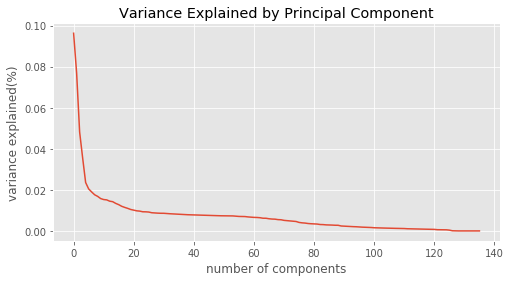

In [59]:
ax = pd.DataFrame(pca.explained_variance_ratio_, columns = ['variance explained']) \
                  .plot(title = 'Variance Explained by Principal Component', legend = False, figsize=(8, 4))

ax.set_xlabel('number of components')
ax.set_ylabel('variance explained(%)')
plt.show()

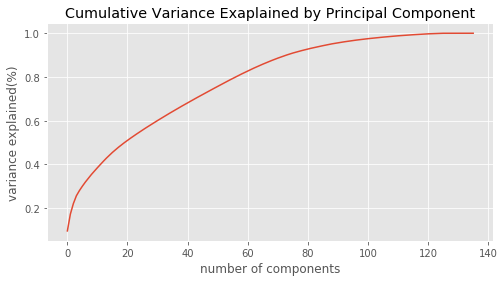

In [60]:
ax = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), columns = ['cumulative variance exaplined']) \
            .plot(title = 'Cumulative Variance Exaplained by Principal Component', legend = False, figsize=(8, 4))

ax.set_xlabel('number of components')
ax.set_ylabel('variance explained(%)')
plt.show()

In [61]:
# Re-apply PCA to the data while selecting for number of components to retain.

In [62]:
# figure out number of components required to cover 90% of the original dataset variance

target = 0.9

n_components_required = min(np.where(np.cumsum(pca.explained_variance_ratio_)>target)[0]+1)
print(f'To cover 90% of data variance, we need {n_components_required} components.')

To cover 90% of data variance, we need 74 components.


In [63]:
# figure out number of components required to cover 80% of the original dataset variance

target = 0.8

n_components_required = min(np.where(np.cumsum(pca.explained_variance_ratio_)>target)[0]+1)
print(f'To cover 80% of data variance, we need {n_components_required} components.')

To cover 80% of data variance, we need 57 components.


In [64]:
# figure out number of components required to cover 70% of the original dataset variance

target = 0.7

n_components_required = min(np.where(np.cumsum(pca.explained_variance_ratio_)>target)[0]+1)
print(f'To cover 70% of data variance, we need {n_components_required} components.')

To cover 70% of data variance, we need 44 components.


In [65]:
pca.explained_variance_ratio_[:n_components_required].sum()

0.70480591484866151

In [66]:
n_components = n_components_required

pca = PCA(n_components, random_state = 0) 
azdias_pca = pca.fit_transform(azdias_scale)

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

* From the graphical analysis, it is obvious that as we include more components to PCA we increase the amount of total variance exaplained. 
* With 74 components, we cover 90% explained variance. With 57 components 80% variance. And with 44 components 70% variance. 
* For the ensuing analysis we opt for 44 components as our designated PCA model. Ultimately the usefulness of the model rests on how well it helps to distinguish between profile of general population and that of the mail order customer database. We will come back to revist PCA configuration should this simpler model fail to deliver satisfactory result in downstream analysis.   

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.


- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [67]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

In [68]:
def comp_weights(pca, n):
    pca_data = pd.DataFrame(pca.components_)
    var = list(azdias_scale.head(0))
    var_dic = {'Feature': var, 'Weight': pca_data.iloc[n,:]}
    pca_weight = pd.DataFrame(var_dic)
    pca_weight_pos = pca_weight.sort_values(by='Weight', ascending=False)[:10]
    pca_weight_neg = pca_weight.sort_values(by='Weight', ascending=True)[:10]
    
    print(f'>>> Top 10 positive feature weights for dimension {dimension}.')
    print(pca_weight_pos)
    print()
    print(f'>>> Top 10 negative feature weights for dimension {dimension}.')
    print(pca_weight_neg)

In [69]:
dimension = 0

comp_weights(pca, dimension)

>>> Top 10 positive feature weights for dimension 0.
                    Feature    Weight
53               PLZ8_ANTG3  0.192854
29       HH_EINKOMMEN_SCORE  0.190457
134  CAMEO_INTL_2015_WEALTH  0.188559
54               PLZ8_ANTG4  0.186603
58              ORTSGR_KLS9  0.164261
43                 EWDICHTE  0.162648
7          FINANZ_HAUSBAUER  0.149087
3             FINANZ_SPARER  0.148652
95       LP_STATUS_FEIN_2.0  0.134146
52               PLZ8_ANTG2  0.131889

>>> Top 10 negative feature weights for dimension 0.
                 Feature    Weight
47            MOBI_REGIO -0.213156
2      FINANZ_MINIMALIST -0.212070
37           KBA05_ANTG1 -0.199946
51            PLZ8_ANTG1 -0.193290
41             KBA05_GBZ -0.189194
34           KONSUMNAEHE -0.143792
56              PLZ8_GBZ -0.141427
44            INNENSTADT -0.136365
107   LP_STATUS_GROB_5.0 -0.120805
103  LP_STATUS_FEIN_10.0 -0.120805


In [70]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

dimension = 1

comp_weights(pca, dimension)

>>> Top 10 positive feature weights for dimension 1.
                  Feature    Weight
0    ALTERSKATEGORIE_GROB  0.224610
4        FINANZ_VORSORGER  0.212614
114            ZABEOTYP_3  0.202143
17              SEMIO_ERL  0.179595
16             SEMIO_LUST  0.161263
10         RETOURTYP_BK_S  0.156526
30         W_KEIT_KIND_HH  0.133251
7        FINANZ_HAUSBAUER  0.118266
60      CJT_GESAMTTYP_2.0  0.106459
68            FINANZTYP_5  0.100813

>>> Top 10 negative feature weights for dimension 1.
                          Feature    Weight
133  PRAEGENDE_JUGENDJAHRE_DECADE -0.231481
3                   FINANZ_SPARER -0.211442
6           FINANZ_UNAUFFAELLIGER -0.209933
13                      SEMIO_REL -0.207013
24                    SEMIO_TRADV -0.204144
5                  FINANZ_ANLEGER -0.196102
23                  SEMIO_PFLICHT -0.195767
48              ONLINE_AFFINITAET -0.170142
18                     SEMIO_KULT -0.165931
19                      SEMIO_RAT -0.158742


In [71]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

dimension = 2

comp_weights(pca, dimension)

>>> Top 10 positive feature weights for dimension 2.
              Feature    Weight
15         SEMIO_VERT  0.330665
12          SEMIO_FAM  0.264374
11          SEMIO_SOZ  0.262040
18         SEMIO_KULT  0.254198
68        FINANZTYP_5  0.140176
2   FINANZ_MINIMALIST  0.137603
13          SEMIO_REL  0.108834
14          SEMIO_MAT  0.088095
10     RETOURTYP_BK_S  0.081827
8    GREEN_AVANTGARDE  0.073280

>>> Top 10 negative feature weights for dimension 2.
                            Feature    Weight
1                         ANREDE_KZ -0.356166
22                       SEMIO_KAEM -0.325233
21                        SEMIO_DOM -0.293935
20                       SEMIO_KRIT -0.270684
17                        SEMIO_ERL -0.204894
19                        SEMIO_RAT -0.167336
5                    FINANZ_ANLEGER -0.161638
111                 SHOPPER_TYP_2.0 -0.095327
95               LP_STATUS_FEIN_2.0 -0.083184
132  PRAEGENDE_JUGENDJAHRE_MOVEMENT -0.071201


### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

* Conceptually the first component measures the effect of **6-10 family houses in region**, **estimated household net income**, **wealth of household**, **movement pattern**, **financial typology**, and **1-2 famiy houses in microcell**. For the first component, it is positively correlated PLZ8_ANTG3 (Number of 6-10 family houses in the PLZ8 region), HH_EINKOMMEN_SCORE (Estimated household net income), and CAMEO_INTL_2015_WEALTH (Wealth of household), and it is negatively correlated with MOBI_REGIO (Movement patterns), FINANZ_MINIMALIST (Financial typology), and KBA05_ANTG1 (Number of 1-2 family houses in the microcell).


* The 2nd component measures the effect of **estimated age**, **financial typology**, **energy consumption**, and **dominating movement of person's youth**. Specifically it is positively correlated with ALTERSKATEGORIE_GROB (Estimated age based on given name analysis), FINANZ_VORSORGER (Financial typology), ZABEOTYP_3 (Energy consumption typology), and it is negatively correlated with PRAEGENDE_JUGENDJAHRE_DECADE (Dominating movement of person's youth), FINANZ_SPARER and FINANZ_UNAUFFAELLIGER (Financial typology).



* for the 3rd component, it measures the effect of **personality** and **gender**. It is positively correlated with SEMIO_VERT, SEMIO_FAM, and SEMIO_SOZ (Personality typology), and negativcely correlated with ANREDE_KZ (Gender), SEMIO_KAEM, and SEMIO_DOM (Personality typology).

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [72]:
from sklearn.cluster import KMeans, MiniBatchKMeans

def calc_kmeans_score():
    
    # Over a number of different cluster counts...
    scores_dict = {}
    for i in range(1,31,1):
        
        # run k-means clustering on the data and...
        kmeans = MiniBatchKMeans(n_clusters = i, random_state = 0)
        kmeans.fit(azdias_pca)

        # compute the average within-cluster distances
        scores = kmeans.score(azdias_pca) * (-1)
#         print(f'cluster number: {i}, within-cluster distance: {scores}')
              
        scores_dict.update( {i: scores} ) 
              
    return scores_dict

In [73]:
scores = calc_kmeans_score()

In [74]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

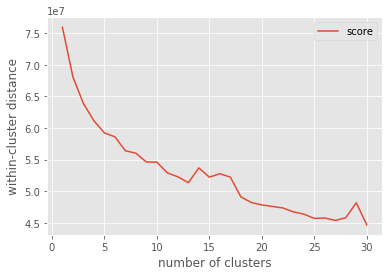

In [75]:
df_scores = pd.DataFrame.from_dict(scores, orient = 'index', columns = ['score'])

ax = df_scores.plot()
ax.set_xlabel('number of clusters')
ax.set_ylabel('within-cluster distance')
plt.show()

In [76]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

# select  as designated number of clusters 

# kmeans = KMeans(n_clusters=20, random_state=0).fit(azdias_pca)
kmeans = MiniBatchKMeans(n_clusters = 20, random_state = 0).fit(azdias_pca)

population_clusters = kmeans.predict(azdias_pca)

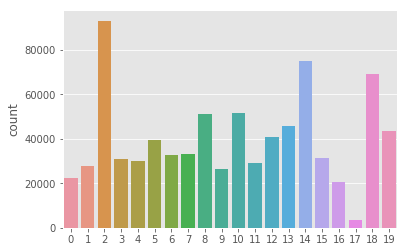

In [77]:
sns.countplot(population_clusters)

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

As we increase the number of clusters, we shrink the average distance wihin the clusters. For now, we opt for 20 clusters to follow through the rest of the analysis, striking a balance between computational expediency and full understanding of the data relationship behind customer segmentations.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [78]:
# Load in the customer demographics data.

customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', delimiter=';')

In [79]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers, customers_with_many_missing = clean_data(customers, outlier_col_idx, azdias_col_list)

imputer = Imputer()
customers = pd.DataFrame(imputer.fit(azdias).transform(customers), columns = customers.columns)

# Standardize or Normalize
customers_scale  = pd.DataFrame(scaler.fit(azdias).transform(customers), columns = customers.columns)

Customer data processed. Returning dataset with 141640 rows, and 136 columns.


In [80]:
customers_scale.shape

(141640, 136)

In [81]:
# Display the first 5 rows of the customers

customers_scale.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,...,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2.0,GEBAEUDETYP_3.0,GEBAEUDETYP_4.0,GEBAEUDETYP_6.0,GEBAEUDETYP_8.0,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_MOVEMENT,PRAEGENDE_JUGENDJAHRE_DECADE,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTYLE,GEBAEUDETYP_5.0
0,1.184837,-1.043765,1.409069,-1.155304,1.137960,-1.249881,-0.469752,-0.792034,1.884775,-1.625569,1.073737,0.957900,0.463466,-1.043706,1.104338,0.885562,1.267817,-0.888119,-0.067639,-1.750402,-0.880050,-1.946174,-1.763643,-1.177846,-1.543203,-0.092133,-1.061070,0.233996,-0.06057,-2.209975,1.073724,0.566714,-0.471171,-0.125732,1.275012,-0.38316,-0.517488,0.369485,0.604994,-0.632113,-0.4913,0.649175,-0.528183,-1.128680,-0.270827,0.283581,-1.834518,0.744053,0.172170,-1.972151,...,-0.15862,-0.167562,-0.115244,-0.439153,-0.255132,2.663435,-0.188724,-0.258281,-0.555629,-0.4022,-0.307544,-0.319718,-0.188988,-0.193846,-0.108042,-0.154721,-0.454054,2.479533,-0.521223,-0.223938,-0.491085,2.479533,-0.294469,-0.206291,-0.670429,-0.589974,1.847267,-0.207652,1.352118,-0.592927,-0.336084,-0.312245,-0.078039,-0.537157,-0.033389,-0.00112,-0.027782,-0.486182,-0.341246,-0.349191,-0.386934,-0.27284,-0.391203,-0.329047,-0.450246,-0.396115,119.526198,-5.053139,-0.179899,-1.94216
1,1.184837,0.958071,1.409069,-1.155304,1.137960,-1.249881,0.959677,0.628533,1.884775,-0.270002,1.073737,-1.102885,-1.104235,-1.567205,-0.463478,-0.656891,1.267817,1.301605,-1.599828,-1.145482,1.392858,0.244076,0.913247,-0.099402,-1.543203,-0.092133,0.987544,-0.630760,-0.06057,-2.209975,1.073724,0.566714,-0.471171,-0.125732,-1.304589,-0.38316,-0.517488,0.369485,0.604994,-0.632113,-0.4913,-0.122338,1.304213,0.035244,-1.750001,-0.799699,0.294404,0.026181,-1.117038,1.435783,...,-0.15862,-0.167562,-0.115244,-0.439153,-0.255132,-0.375455,-0.188724,-0.258281,-0.555629,-0.4022,-0.307544,-0.319718,-0.188988,-0.193846,-0.108042,-0.154721,-0.454054,2.479533,-0.521223,-0.223938,-0.491085,2.479533,-0.294469,-0.206291,1.491582,-0.589974,-0.541340,-0.207652,1.352118,-0.592927,-0.336084,-0.312245,-0.078039,-0.537157,-0.033389,-0.00112,35.994828,-0.486182,-0.341246,-0.349191,2.584420,-0.27284,-0.391203,-0.329047,-0.450246,-0.396115,119.526198,-4.913394,0.505507,-1.94216
2,1.184837,-1.043765,1.409069,-1.155304,1.137960,-0.570799,-1.184467,-0.792034,-0.530567,-0.270002,-0.305321,0.957900,0.463466,-0.520206,0.059127,1.399712,0.316750,-0.888119,-0.067639,-0.540563,-0.880050,-0.851049,-0.692887,-0.638624,0.155902,-0.092133,-1.061070,-1.495517,-0.06057,-0.268331,0.000000,0.566714,0.000000,0.000000,-0.659689,-0.38316,-0.517488,1.100096,-1.042561,-0.632113,-0.4913,0.649175,1.304213,-1.710641,1.208346,0.283581,0.294404,0.744053,-0.472434,0.867794,...,-0.15862,-0

In [82]:
# Apply the fitted pca and kmeans on the customer data

customers_pca = pca.transform(customers_scale)
customers_clusters = kmeans.predict(customers_pca)

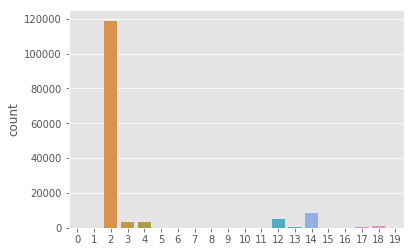

In [83]:
sns.countplot(customers_clusters)

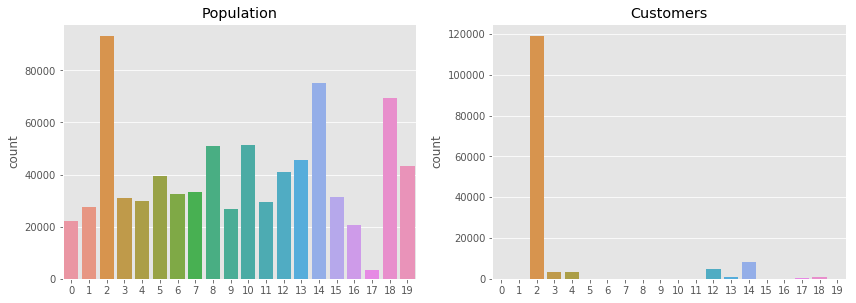

In [84]:
# quick comparison of the population clusters and customer clusters (not yet normalized to percentage terms)

population = pd.DataFrame.from_dict(population_clusters)
customers = pd.DataFrame.from_dict(customers_clusters)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Population')
sns.countplot(population_clusters)

plt.subplot(2, 2, 2)
plt.title('Customers')
sns.countplot(customers_clusters)

plt.tight_layout()
plt.show()

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [85]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

In [86]:
# create dataframe of clusters and their corresponding shares in population and customer

pop = pd.DataFrame({'Cluster': population_clusters})
pop['Count'] = 1
pop  = pop.groupby('Cluster')['Count'].sum().to_frame() 
pop['Cluster'] = list(range(0,20))
pop.columns = ['Count','Cluster']

pop_extra = azdias_with_many_missing.shape[0] - azdias.shape[0]
pop =  pop.append({'Count': pop_extra, 'Cluster': 'extra'}, ignore_index=True)

pop['Percentage'] = pop['Count'].apply(lambda x: x/pop['Count'].sum())
pop['Group'] = 'Population'

In [87]:
cust = pd.DataFrame({'Cluster': customers_clusters})
cust['Count'] = 1
cust = cust.groupby('Cluster')['Count'].sum().to_frame() 
cust['Cluster'] = list(range(0,20))
cust.columns = ['Count','Cluster']

cust_extra = customers_with_many_missing.shape[0] - customers.shape[0]
cust =  cust.append({'Count': cust_extra, 'Cluster': 'extra'}, ignore_index=True)

cust['Percentage'] = cust['Count'].apply(lambda x: x/cust['Count'].sum())
cust['Group'] = 'Customers'

In [88]:
compare_groups = pd.concat([pop, cust], axis=0)
# compare_groups.head()

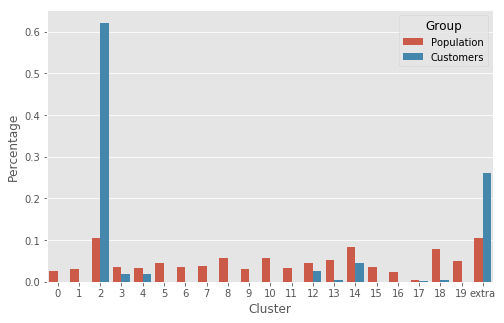

In [89]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 1, 1)
sns.barplot(x = 'Cluster', y = 'Percentage', hue = 'Group', data = compare_groups)

plt.show()

In [90]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

In [91]:
# precisely quantify differences in cluster shares between population and customer 

pop_dict = pop.to_dict()['Percentage']
cust_dict = cust.to_dict()['Percentage']
cluster_dict = cust.to_dict()['Cluster']

compare_groups2 = pd.DataFrame({'pop_pct':pd.Series(pop_dict),'cust_pct':pd.Series(cust_dict), 'cluster': pd.Series(cluster_dict)})
compare_groups2['diff']  = compare_groups2['pop_pct'] - compare_groups2['cust_pct']

compare_groups2_sort = compare_groups2.iloc[compare_groups2['diff'].abs().argsort()[::-1]]
compare_groups2_sort


,pop_pct,cust_pct,cluster,diff
2,0.104498,0.620531,2,-0.516033
20,0.105243,0.260952,extra,-0.155709
18,0.077699,0.005327,18,0.072372
10,0.057821,0.000010,10,0.057810
8,0.057321,0.000172,8,0.057149
19,0.048691,0.000026,19,0.048664
13,0.051175,0.003658,13,0.047517
5,0.044104,0.000016,5,0.044088
14,0.084342,0.044137,14,0.040204
7,0.037461,0.000250,7,0.037211


In [92]:
# over-represented Cluster 8. Working out the centroids of this cluster. 

a = list(kmeans.cluster_centers_[2])
b = list(range(0,len(a)))

cluster2 = pd.DataFrame({'Compnent': b, 'Centroid': a})
cluster2 = cluster2.sort_values('Compnent', ascending = True)
cluster2 = cluster2['Centroid'].values.reshape(1, 44)
# cluster6.shape

In [93]:
# reverse engineering to get the cluster centroid's position on the original feature space

reverse_features = pca.inverse_transform(cluster2)
reverse_cluster = scaler.inverse_transform(reverse_features)
df_reverse_cluster = pd.DataFrame(np.round(reverse_cluster), columns = azdias.columns)

In [94]:
# map out centroid's characteristics on key feature subspace

feature_checks = ['PLZ8_ANTG3', 'HH_EINKOMMEN_SCORE', 'CAMEO_INTL_2015_WEALTH', 'MOBI_REGIO', 'KBA05_ANTG1',
                  'ALTERSKATEGORIE_GROB', 'PRAEGENDE_JUGENDJAHRE_DECADE', 'ANREDE_KZ']

df_reverse_cluster[feature_checks]

,PLZ8_ANTG3,HH_EINKOMMEN_SCORE,CAMEO_INTL_2015_WEALTH,MOBI_REGIO,KBA05_ANTG1,ALTERSKATEGORIE_GROB,PRAEGENDE_JUGENDJAHRE_DECADE,ANREDE_KZ
0,1.0,4.0,2.0,4.0,3.0,3.0,64.0,1.0


In [95]:
 
# PLZ8_ANTG3[1]: lower share of 6-10 family homes
# HH_EINKOMMEN_SCORE[4]: average income
# CAMEO_INTL_2015_WEALTH[2]: Prosperous Households
# MOBI_REGIO[4]: low movement
# KBA05_ANTG1[3] high share of 1-2 family homes in the microcell
# ALTERSKATEGORIE_GROB[3]: 46 - 60 years old
# PRAEGENDE_JUGENDJAHRE_DECADE[64]: 60's decade
# ANREDE_KZ[1]: male


In [96]:
# under-represented cluster 0. Working out the centroids of this cluster. 

a = list(kmeans.cluster_centers_[18])
b = list(range(0,len(a)))

cluster18 = pd.DataFrame({'Compnent': b, 'Centroid': a})
cluster18 = cluster18.sort_values('Compnent', ascending = True)
cluster18 = cluster18['Centroid'].values.reshape(1, 44)
# cluster4.shape

In [97]:
# reverse engineering to get the cluster centroid's position on the original feature space

reverse_features = pca.inverse_transform(cluster18)
reverse_cluster = scaler.inverse_transform(reverse_features)
df_reverse_cluster = pd.DataFrame(np.round(reverse_cluster), columns = azdias.columns)

In [98]:
# map out centroid's characteristics on key feature subspace

feature_checks = ['PLZ8_ANTG3', 'HH_EINKOMMEN_SCORE', 'CAMEO_INTL_2015_WEALTH', 'MOBI_REGIO', 'KBA05_ANTG1',
                  'ALTERSKATEGORIE_GROB', 'PRAEGENDE_JUGENDJAHRE_DECADE', 'ANREDE_KZ']

df_reverse_cluster[feature_checks]

,PLZ8_ANTG3,HH_EINKOMMEN_SCORE,CAMEO_INTL_2015_WEALTH,MOBI_REGIO,KBA05_ANTG1,ALTERSKATEGORIE_GROB,PRAEGENDE_JUGENDJAHRE_DECADE,ANREDE_KZ
0,2.0,6.0,4.0,2.0,0.0,2.0,86.0,2.0


In [99]:

# PLZ8_ANTG3[2]: average share of 6-10 family homes
# HH_EINKOMMEN_SCORE[6]: very low income
# CAMEO_INTL_2015_WEALTH[4]: Less Affluent Households
# MOBI_REGIO[2]: high movement
# KBA05_ANTG1[0]: no 1-2 family homes in the microcell
# ALTERSKATEGORIE_GROB[2]: 30 - 45 years old
# PRAEGENDE_JUGENDJAHRE_DECADE[86]: 80's decade
# ANREDE_KZ[2]: female

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

* **Cluster 2** is conspicuously proportionally higher in the customer database vis-a-vis the population database. This group signifies people with PLZ8_ANTG3[1]: lower share of 6-10 family homes, HH_EINKOMMEN_SCORE[4]: average income, CAMEO_INTL_2015_WEALTH[2]: Prosperous Households, MOBI_REGIO[4]: low movement, KBA05_ANTG1[3]: high share of 1-2 family homes in the microcell, ALTERSKATEGORIE_GROB[3]: 46 - 60 years old, PRAEGENDE_JUGENDJAHRE_DECADE[64]: 60s decade, ANREDE_KZ[1]: male. 


* **Cluster 'extra'**, with many missing values (observations with at least 20 features missing), is also proportionally higher in the customer database verses population database. We may either consider collecting more feature information for the customer database, or where it is not feasible, consider mapping features from the customer database to population, and use the smaller subset to create a less feature rich PCA model. 


* **Cluster 18** is proportionately under-represetned in the customer database in comparison to population database. This group denotes people with # PLZ8_ANTG3[2]: average share of 6-10 family homes, HH_EINKOMMEN_SCORE[6]: very low income, CAMEO_INTL_2015_WEALTH[4]: Less Affluent Households, MOBI_REGIO[2]: high movement, KBA05_ANTG1[0]: no 1-2 family homes in the microcell, ALTERSKATEGORIE_GROB[2]: 30 - 45 years old, PRAEGENDE_JUGENDJAHRE_DECADE[86]: 80s decade, ANREDE_KZ[2]: female.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.